In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re
from nltk.corpus import stopwords
import os 
%matplotlib inline

In [2]:
from pathlib import Path

condition = "Dreamachine"

metaproject_name = 'TopicModelling_META'
subproject_name = 'TopMod_pipeline'
dataset_name = f'{condition}_dataset.csv'

PROJDIR = os.path.expanduser(f"~/projects/{metaproject_name}")
DATADIR = os.path.join(PROJDIR,f'DATA/{dataset_name}')
CODEDIR = os.path.join(PROJDIR,f'{subproject_name}')


reports = pd.read_csv(DATADIR,usecols=['text'])
print(reports.info())
reports.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    377 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB
None


,text
0,the colours made patterns when i had my eyes c...
1,Intense chaos. And then my mind checked out an...
2,good stuff.\n
3,a pattern of red and white lights thatflashed ...
4,i wentback to many hard and mostly beautiful m...


### Text preprocessing : removing stopwords and punctuation

In [3]:
import re 

# Remove punctuation
def process_text(x):
    if isinstance(x, str):  # check if x is of type string
        x = re.sub('[-;,\'.!?:]', '', x)  # if it is, do the replacement
        x = re.sub('^[0-9]+', '', x)  # remove initial numbers
        return x.lower()
    else:
        return ""  # otherwise, return an empty string or you can convert it to string by using `return str(x)`

reports['text_processed'] = reports['text'].map(process_text)

# Convert the titles to lowercase
reports['text_processed'] = reports['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
reports['text_processed'].head()
all_reports_list = ' '.join(reports['text_processed'].tolist()).replace('\n', '') #creates one big list concatanating all reports in one str



#Creation stopwords
#dreamachine_stop_words = ['experience','experiences','felt','closed','eyes','experienced','like','many','also','end','one','eg','another','thanks','fell','feels','alot','charlie','keep','made','almost','feel','really','something','would','never','back','lot','things','much','could','see','saw','sometimes','thoughts','bit','nd','sense','devtest','light','lights','thought','well','way','away','get','coming','came','take','though']
dreamachine_stop_words_list1 = ['less','mean','pause','[pause]','[laughs]','dont','quite','eh','hm','moment','[pasue]','yes','kind','looking','say','sort','sure','look','makes','pasue','distance','always','think','know','literally','describe','descriptives','differently','let','depending','CR','okay','mm','Okay','yeah','thing','stop','erm','pause','experience','experiences','felt','closed','eyes','experienced','like','many','also','end','one','eg','another','thanks','fell','feels','alot','charlie','keep','made','almost','feel','really','something','would','never','back','lot','things','much','could','see','saw','sometimes','thoughts','bit','nd','sense','devtest','light','lights','thought','well','way','away','get','coming','came','take','though']
dreamachine_stop_words_list2 = ['yes','kind','looking','say','sort','sure','look','makes','pasue','distance','always','think','know','literally','describe','descriptives','differently','let','depending','CR','okay','mm','Okay','yeah','thing','stop','erm','pause','experience','experiences','felt','closed','eyes','experienced','like','many','also','end','one','eg','another','thanks','fell','feels','alot','charlie','keep','made','almost','feel','really','something','would','never','back','lot','things','much','could','see','saw','sometimes','thoughts','bit','nd','sense','devtest','light','lights','thought','well','way','away','get','coming','came','take','though']
new_stop_words = ['found','think','didnt','across','even','front','go','kept','took','wasnt','looking','trying','thinking','ive','point','lots','couldnt','next','got','first']
general_stop_words = ['from']
stop_words_eng = stopwords.words('english')
stop_words_list = stop_words_eng + dreamachine_stop_words_list1 + dreamachine_stop_words_list2 + general_stop_words+new_stop_words
# print(stop_words_list)


In [4]:


#create function to get a DataFrame
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words_list and i != '']
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d


df_words = get_df(all_reports_list)
df_words.head(10)

,words,count
0,colours,34
1,time,32
2,music,27
3,space,25
4,patterns,23
5,body,22
6,moving,22
7,shapes,20
8,mind,18
9,towards,17


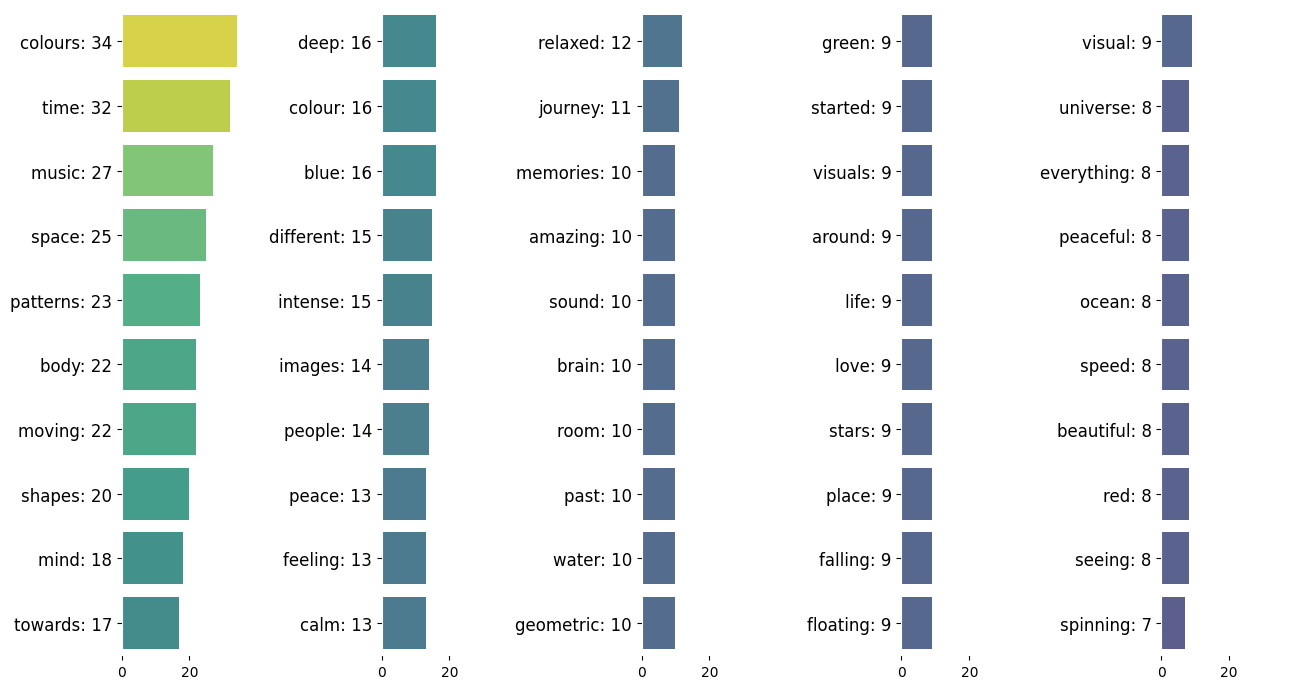

In [5]:
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(50), 5)]

n = df_words['count'].max()
color_dict = get_colordict('viridis', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(13,7), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df = df_words[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,10))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+1)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show()

In [6]:

n = 50
pal = list(sns.color_palette(palette='Reds_r', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_words[0:30], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [7]:
import plotly.express as px
fig = px.treemap(df_words[0:100], path=[px.Constant("dreamachine open reports"), 'words'],
                 values='count',
                 color='count',
                 color_continuous_scale='viridis',
                 color_continuous_midpoint=np.average(df_words['count'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

NB : this visualisation can help us indentify and define more stop words

new_stop_words = ['found','think','didnt','across','even','front','go','kept','took','wasnt','looking','trying','thinking']

In [8]:
import circlify
# compute circle positions:
circles = circlify.circlify(df_words['count'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = df_words['count'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

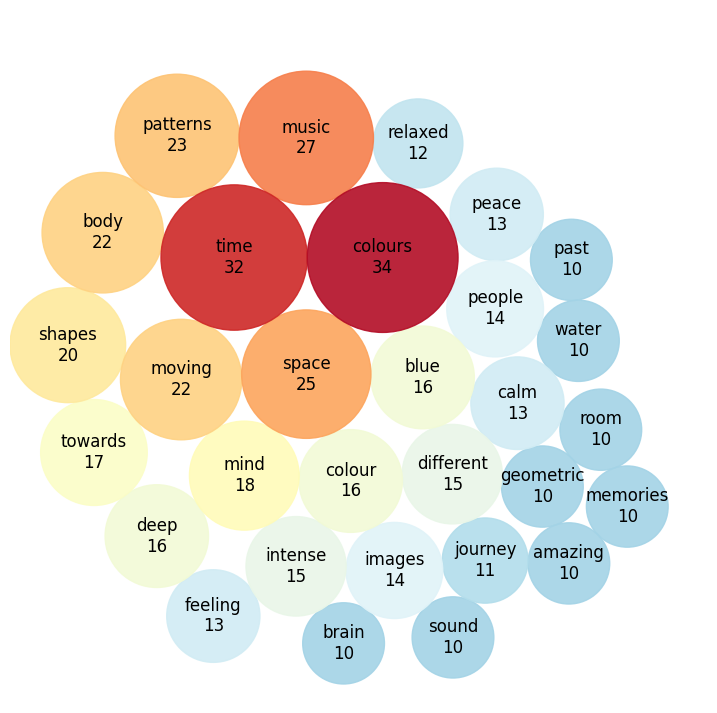

In [9]:

fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(df_words['words'][0:30])
counts = list(df_words['count'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()